# 1.Problem :

Menganlisis Benacana yang terjadi secara globla serta dampaknya terhadap

•Ekonomi

•Sosial

# 2.Data Collection

•Mengambil Data

In [ ]:

from google.colab import files

# Untuk mengupload file dari perangkat
uploaded = files.upload()

Saving Data_Bencana_em-dt.xlsx to Data_Bencana_em-dt.xlsx


# EDA and cleaning Data

•Menampilkan informasi dan isi data (Hanya 5 contoh sebagai validasi bahwa data berhasil terupload)

In [ ]:
import pandas as pd

# Baca file Excel yang diupload
file_path = '/content/Data_Bencana_em-dt.xlsx'  # Path file di Colab setelah diupload

# Membaca data dari sheet pertama (default)
data = pd.read_excel(file_path)

# Melihat informasi dasar tentang dataset (jumlah baris, kolom, tipe data, dll.)
data.info()

# Melihat statistik deskriptif untuk data numerik
data.describe()

# Menampilkan beberapa baris pertama data
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6531 entries, 0 to 6530
Data columns (total 46 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   DisNo.                                     6531 non-null   object 
 1   Historic                                   6531 non-null   object 
 2   Classification Key                         6531 non-null   object 
 3   Disaster Group                             6531 non-null   object 
 4   Disaster Subgroup                          6531 non-null   object 
 5   Disaster Type                              6531 non-null   object 
 6   Disaster Subtype                           6531 non-null   object 
 7   External IDs                               1071 non-null   object 
 8   Event Name                                 2232 non-null   object 
 9   ISO                                        6531 non-null   object 
 10  Country                 

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
0,2000-0003-BGD,No,nat-met-ext-col,Natural,Meteorological,Extreme temperature,Cold wave,NaN,NaN,BGD,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm1_code"":575,""adm1_name"":""Barisal""},{""adm...",2003-07-01,2023-09-25
1,2000-0005-CHN,No,tec-tra-roa-roa,Technological,Transport,Road,Road,NaN,NaN,CHN,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,NaN,2005-02-09,2023-09-25
2,2000-0006-CHN,No,tec-mis-fir-fir,Technological,Miscellaneous accident,Fire (Miscellaneous),Fire (Miscellaneous),NaN,Hotel,CHN,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,NaN,2003-07-01,2023-09-25
3,2000-0009-IRN,No,nat-met-sto-sto,Natural,Meteorological,Storm,Storm (General),NaN,NaN,IRN,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm1_code"":1545,""adm1_name"":""Gilan""}]",2003-07-01,2023-09-25
4,2000-0010-IDN,No,tec-tra-roa-roa,Technological,Transport,Road,Road,NaN,NaN,IDN,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,NaN,2003-07-01,2023-09-25


• Memeriksa Missing Value

In [ ]:

# Memeriksa jumlah missing values di setiap kolom
data.isnull().sum()

,0
DisNo.,0
Historic,0
Classification Key,0
Disaster Group,0
Disaster Subgroup,0
Disaster Type,0
Disaster Subtype,0
External IDs,5460
Event Name,4299
ISO,0


• Pembersihan data dari Missing Vallue

In [ ]:

# Menghapus kolom yang tidak diperlukan dengan banyak missing values
columns_to_drop = ['External IDs', 'Event Name', 'Origin', 'Associated Types', 'River Basin']
data_cleaned = data.drop(columns=columns_to_drop)

# Mengisi missing values untuk kolom numerik dengan median (untuk kolom seperti 'Total Deaths', 'No. Injured', dll.)
data_cleaned["Total Deaths"] = data_cleaned["Total Deaths"].fillna(data_cleaned["Total Deaths"].median())
data_cleaned["No. Injured"] = data_cleaned["No. Injured"].fillna(data_cleaned["No. Injured"].median())
data_cleaned["No. Affected"] = data_cleaned["No. Affected"].fillna(data_cleaned["No. Affected"].median())
data_cleaned["No. Homeless"] = data_cleaned["No. Homeless"].fillna(data_cleaned["No. Homeless"].median())
data_cleaned["Total Affected"] = data_cleaned["Total Affected"].fillna(data_cleaned["Total Affected"].median())
data_cleaned["Reconstruction Costs ('000 US$)"] = data_cleaned["Reconstruction Costs ('000 US$)"].fillna(data_cleaned["Reconstruction Costs ('000 US$)"].median())
data_cleaned["Insured Damage ('000 US$)"] = data_cleaned["Insured Damage ('000 US$)"].fillna(data_cleaned["Insured Damage ('000 US$)"].median())
data_cleaned["Total Damage ('000 US$)"] = data_cleaned["Total Damage ('000 US$)"].fillna(data_cleaned["Total Damage ('000 US$)"].median())

# Mengisi missing values untuk kolom kategorikal dengan mode (nilai yang paling sering muncul)
data_cleaned["Disaster Subtype"] = data_cleaned["Disaster Subtype"].fillna(data_cleaned["Disaster Subtype"].mode()[0])
data_cleaned["Location"] = data_cleaned["Location"].fillna(data_cleaned["Location"].mode()[0])

# Mengisi missing values untuk kolom tanggal dengan mode atau nilai yang masuk akal
data_cleaned["Start Month"] = data_cleaned["Start Month"].fillna(data_cleaned["Start Month"].mode()[0])
data_cleaned["Start Day"] = data_cleaned["Start Day"].fillna(data_cleaned["Start Day"].mode()[0])
data_cleaned["End Month"] = data_cleaned["End Month"].fillna(data_cleaned["End Month"].mode()[0])
data_cleaned["End Day"] = data_cleaned["End Day"].fillna(data_cleaned["End Day"].mode()[0])

# Pastikan data yang hilang telah terisi atau dihapus
print(data_cleaned.isnull().sum())

DisNo.                                          0
Historic                                        0
Classification Key                              0
Disaster Group                                  0
Disaster Subgroup                               0
Disaster Type                                   0
Disaster Subtype                                0
ISO                                             0
Country                                         0
Subregion                                       0
Region                                          0
Location                                        0
OFDA/BHA Response                               0
Appeal                                          0
Declaration                                     0
AID Contribution ('000 US$)                  6306
Magnitude                                    4982
Magnitude Scale                              2274
Latitude                                     5597
Longitude                                    5597


In [ ]:
import ast

# Fungsi untuk mengekstrak nama wilayah dari objek JSON
def extract_admin_name(admin_unit):
    try:
        # Cek apakah admin_unit berupa string, jika ya, ubah menjadi objek Python
        if isinstance(admin_unit, str):
            try:
                admin_unit = ast.literal_eval(admin_unit)  # Mengubah string ke objek Python
            except (ValueError, SyntaxError):
                return "Invalid format"  # Mengatasi entri yang tidak bisa di-convert

        # Pastikan admin_unit adalah list dan memiliki elemen
        if isinstance(admin_unit, list) and len(admin_unit) > 0:
            # Mengambil nama wilayah dari elemen pertama di dalam list
            return admin_unit[0].get('adm1_name', "Unknown")
        else:
            return "Unknown"
    except Exception as e:
        return "Unknown"  # Jika terjadi error, kembalikan "Unknown"

# Terapkan fungsi ke kolom "Admin Units"
data_cleaned["Admin Units"] = data_cleaned["Admin Units"].apply(extract_admin_name)

In [ ]:
# Ganti "Invalid format" dengan "Unknown" atau nilai default lainnya di kolom "Admin Units"
data_cleaned["Admin Units"] = data_cleaned["Admin Units"].replace("Invalid format", "Unknown")

# Mengisi missing values untuk kolom numerik dengan median
data_cleaned["AID Contribution ('000 US$)"] = data_cleaned["AID Contribution ('000 US$)"].fillna(data_cleaned["AID Contribution ('000 US$)"].median())
data_cleaned["Magnitude"] = data_cleaned["Magnitude"].fillna(data_cleaned["Magnitude"].median())
data_cleaned["Latitude"] = data_cleaned["Latitude"].fillna(data_cleaned["Latitude"].median())
data_cleaned["Longitude"] = data_cleaned["Longitude"].fillna(data_cleaned["Longitude"].median())
data_cleaned["CPI"] = data_cleaned["CPI"].fillna(data_cleaned["CPI"].median())

# Mengisi missing values untuk kolom kategorikal atau string
data_cleaned["Admin Units"] = data_cleaned["Admin Units"].fillna(data_cleaned["Admin Units"].mode()[0])

# Mengisi missing values untuk kolom numerik yang memiliki nilai hilang lebih sedikit
data_cleaned["Reconstruction Costs ('000 US$)"] = data_cleaned["Reconstruction Costs ('000 US$)"].fillna(data_cleaned["Reconstruction Costs ('000 US$)"].median())
data_cleaned["Insured Damage ('000 US$)"] = data_cleaned["Insured Damage ('000 US$)"].fillna(data_cleaned["Insured Damage ('000 US$)"].median())
data_cleaned["Total Damage ('000 US$)"] = data_cleaned["Total Damage ('000 US$)"].fillna(data_cleaned["Total Damage ('000 US$)"].median())

# Mengisi missing values untuk kolom kategorikal
data_cleaned["Disaster Subtype"] = data_cleaned["Disaster Subtype"].fillna(data_cleaned["Disaster Subtype"].mode()[0])
data_cleaned["Location"] = data_cleaned["Location"].fillna(data_cleaned["Location"].mode()[0])

# Mengisi missing values untuk kolom tanggal dengan mode atau nilai yang masuk akal
data_cleaned["Start Month"] = data_cleaned["Start Month"].fillna(data_cleaned["Start Month"].mode()[0])
data_cleaned["Start Day"] = data_cleaned["Start Day"].fillna(data_cleaned["Start Day"].mode()[0])
data_cleaned["End Month"] = data_cleaned["End Month"].fillna(data_cleaned["End Month"].mode()[0])
data_cleaned["End Day"] = data_cleaned["End Day"].fillna(data_cleaned["End Day"].mode()[0])

# Pastikan data yang hilang telah terisi atau dihapus
print(data_cleaned.isnull().sum())

DisNo.                                          0
Historic                                        0
Classification Key                              0
Disaster Group                                  0
Disaster Subgroup                               0
Disaster Type                                   0
Disaster Subtype                                0
ISO                                             0
Country                                         0
Subregion                                       0
Region                                          0
Location                                        0
OFDA/BHA Response                               0
Appeal                                          0
Declaration                                     0
AID Contribution ('000 US$)                     0
Magnitude                                       0
Magnitude Scale                              2274
Latitude                                        0
Longitude                                       0


In [29]:
# Fungsi untuk membersihkan nilai dengan unit atau simbol dan mengonversinya menjadi angka
def clean_numeric_column(column):
    # Menghapus unit atau simbol yang ada (misalnya, '°C', 'Km2', 'm3', dll.)
    column_cleaned = column.replace(r'[^\d.]', '', regex=True)
    # Mengonversi ke tipe data numerik
    return pd.to_numeric(column_cleaned, errors='coerce')

# Terapkan fungsi pada kolom yang memiliki masalah
data_cleaned["Magnitude Scale"] = clean_numeric_column(data_cleaned["Magnitude Scale"])
data_cleaned["Reconstruction Costs, Adjusted ('000 US$)"] = clean_numeric_column(data_cleaned["Reconstruction Costs, Adjusted ('000 US$)"])
data_cleaned["Insured Damage, Adjusted ('000 US$)"] = clean_numeric_column(data_cleaned["Insured Damage, Adjusted ('000 US$)"])
data_cleaned["Total Damage, Adjusted ('000 US$)"] = clean_numeric_column(data_cleaned["Total Damage, Adjusted ('000 US$)"])

# Mengisi missing values dengan median
data_cleaned["Magnitude Scale"] = data_cleaned["Magnitude Scale"].fillna(data_cleaned["Magnitude Scale"].median())
data_cleaned["Reconstruction Costs, Adjusted ('000 US$)"] = data_cleaned["Reconstruction Costs, Adjusted ('000 US$)"].fillna(data_cleaned["Reconstruction Costs, Adjusted ('000 US$)"].median())
data_cleaned["Insured Damage, Adjusted ('000 US$)"] = data_cleaned["Insured Damage, Adjusted ('000 US$)"].fillna(data_cleaned["Insured Damage, Adjusted ('000 US$)"].median())
data_cleaned["Total Damage, Adjusted ('000 US$)"] = data_cleaned["Total Damage, Adjusted ('000 US$)"].fillna(data_cleaned["Total Damage, Adjusted ('000 US$)"].median())

# Pastikan data yang hilang telah terisi atau dihapus
print(data_cleaned.isnull().sum())

DisNo.                                       0
Historic                                     0
Classification Key                           0
Disaster Group                               0
Disaster Subgroup                            0
Disaster Type                                0
Disaster Subtype                             0
ISO                                          0
Country                                      0
Subregion                                    0
Region                                       0
Location                                     0
OFDA/BHA Response                            0
Appeal                                       0
Declaration                                  0
AID Contribution ('000 US$)                  0
Magnitude                                    0
Magnitude Scale                              0
Latitude                                     0
Longitude                                    0
Start Year                                   0
Start Month  

• Memeriksa Duplikasi Data

In [30]:

# Memeriksa jumlah duplikat di dataset
duplicate_rows = data_cleaned.duplicated().sum()
print(f"Jumlah duplikat: {duplicate_rows}")

Jumlah duplikat: 0


• Tahan Inkonsistensi

In [31]:

# Memeriksa tipe data kolom
print(data_cleaned.dtypes)

# Memeriksa apakah ada nilai yang tidak sesuai format
print(data_cleaned["Magnitude Scale"].unique())
print(data_cleaned["CPI"].unique())

DisNo.                                        object
Historic                                      object
Classification Key                            object
Disaster Group                                object
Disaster Subgroup                             object
Disaster Type                                 object
Disaster Subtype                              object
ISO                                           object
Country                                       object
Subregion                                     object
Region                                        object
Location                                      object
OFDA/BHA Response                             object
Appeal                                        object
Declaration                                   object
AID Contribution ('000 US$)                  float64
Magnitude                                    float64
Magnitude Scale                              float64
Latitude                                     f

In [32]:
# Menghapus simbol atau karakter yang tidak diinginkan dan mengonversi menjadi numerik
data_cleaned["Magnitude Scale"] = pd.to_numeric(data_cleaned["Magnitude Scale"], errors='coerce')
data_cleaned["CPI"] = pd.to_numeric(data_cleaned["CPI"], errors='coerce')

In [33]:
# Memeriksa nilai ekstrem atau tidak valid
print(data_cleaned[data_cleaned["Magnitude"] < 0])  # Magnitude tidak boleh negatif
print(data_cleaned[data_cleaned["Latitude"].abs() > 90])  # Latitude tidak boleh lebih dari 90
print(data_cleaned[data_cleaned["Longitude"].abs() > 180])  # Longitude tidak boleh lebih dari 180

             DisNo. Historic Classification Key Disaster Group  \
345   2001-0011-IND       No    nat-met-ext-col        Natural   
346   2001-0017-KAZ       No    nat-met-ext-col        Natural   
349   2001-0027-AFG       No    nat-met-ext-col        Natural   
1281  2004-0010-TUR       No    nat-met-ext-col        Natural   
2603  2008-0050-TJK       No    nat-met-ext-sev        Natural   
3038  2009-0595-BGD       No    nat-met-ext-col        Natural   
3039  2009-0595-IND       No    nat-met-ext-col        Natural   
3050  2009-0632-MNG       No    nat-met-ext-col        Natural   
3325  2011-0007-IND       No    nat-met-ext-col        Natural   
3570  2012-0019-AZE       No    nat-met-ext-col        Natural   
3578  2012-0050-AFG       No    nat-met-ext-sev        Natural   
3579  2012-0050-TJK       No    nat-met-ext-sev        Natural   
3784  2013-0027-TJK       No    nat-met-ext-sev        Natural   
3998  2013-0568-ARM       No    nat-met-ext-sev        Natural   
4020  2014

In [34]:
# Menghapus atau mengganti nilai yang tidak valid
data_cleaned = data_cleaned[data_cleaned["Magnitude"] >= 0]
data_cleaned = data_cleaned[data_cleaned["Latitude"].abs() <= 90]
data_cleaned = data_cleaned[data_cleaned["Longitude"].abs() <= 180]

In [35]:
# Memeriksa nilai unik dalam kolom kategorikal
print(data_cleaned["Country"].unique())
print(data_cleaned["Disaster Type"].unique())

['Bangladesh' 'China' 'Iran (Islamic Republic of)' 'Indonesia' 'India'
 'Philippines' 'Pakistan' 'Mongolia' 'Afghanistan' 'Viet Nam' 'Thailand'
 'Israel' 'Jordan' 'Malaysia' 'Sri Lanka' 'Japan' 'Türkiye'
 'Republic of Korea' 'Saudi Arabia' 'Kazakhstan' 'Cyprus'
 "Lao People's Democratic Republic"
 'China, Hong Kong Special Administrative Region' 'Cambodia' 'Nepal'
 'Bhutan' 'Taiwan (Province of China)' 'Bahrain' 'Yemen'
 "Democratic People's Republic of Korea" 'Iraq' 'Azerbaijan' 'Singapore'
 'Kyrgyzstan' 'Georgia' 'Tajikistan' 'Lebanon' 'Syrian Arab Republic'
 'Turkmenistan' 'Uzbekistan' 'Armenia' 'Myanmar' 'Timor-Leste'
 'United Arab Emirates' 'Oman' 'Maldives' 'State of Palestine'
 'China, Macao Special Administrative Region' 'Qatar' 'Kuwait']
['Extreme temperature' 'Road' 'Fire (Miscellaneous)' 'Storm' 'Earthquake'
 'Rail' 'Collapse (Industrial)' 'Flood' 'Epidemic' 'Air'
 'Mass movement (wet)' 'Volcanic activity' 'Explosion (Industrial)'
 'Explosion (Miscellaneous)' 'Wildfire' 'Gas

In [36]:
# Menghapus spasi ekstra dan mengonversi ke huruf kecil untuk konsistensi
data_cleaned["Country"] = data_cleaned["Country"].str.strip().str.lower()
data_cleaned["Disaster Type"] = data_cleaned["Disaster Type"].str.strip().str.lower()

In [37]:
# Memeriksa nilai yang tidak dikenal
print(data_cleaned[data_cleaned["Admin Units"] == "Unknown"])

             DisNo. Historic Classification Key Disaster Group  \
0     2000-0003-BGD       No    nat-met-ext-col        Natural   
1     2000-0005-CHN       No    tec-tra-roa-roa  Technological   
2     2000-0006-CHN       No    tec-mis-fir-fir  Technological   
3     2000-0009-IRN       No    nat-met-sto-sto        Natural   
4     2000-0010-IDN       No    tec-tra-roa-roa  Technological   
...             ...      ...                ...            ...   
6526  2025-0223-MMR       No    nat-geo-ear-gro        Natural   
6527  2025-0223-THA       No    nat-geo-ear-gro        Natural   
6528  2025-0227-IRQ       No    nat-hyd-flo-flo        Natural   
6529  2025-0235-MYS       No    tec-ind-fir-fir  Technological   
6530  2025-0237-IND       No    tec-ind-exp-exp  Technological   

           Disaster Subgroup           Disaster Type        Disaster Subtype  \
0             Meteorological     extreme temperature               Cold wave   
1                  Transport                   

In [39]:
import numpy as np  # Impor numpy

# Mengganti "Unknown" dengan NaN atau nilai lainnya
data_cleaned["Admin Units"] = data_cleaned["Admin Units"].replace("Unknown", np.nan)

<ipython-input-39-cdcb3632e5ad>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_cleaned["Admin Units"] = data_cleaned["Admin Units"].replace("Unknown", np.nan)


In [41]:
# Memeriksa kolom tanggal untuk format yang konsisten
print(data_cleaned["Start Day"].unique())
print(data_cleaned["End Day"].unique())

[ 1.  9. 18.  5.  3.  2. 28. 30. 14. 11. 26. 22. 16. 19. 25. 24. 27.  6.
 17. 29.  8. 10. 31. 13. 21. 15.  4. 12. 20.  7. 23.]
[20.  1.  9. 18.  5.  3.  2. 28. 30. 14. 11. 26. 22. 16. 19. 24. 25. 27.
  6. 17. 29.  8. 10. 31. 13. 21. 15.  4. 12.  7. 23.]


In [43]:
# Mengonversi kolom tanggal ke format datetime yang konsisten
data_cleaned["Start Day"] = pd.to_datetime(data_cleaned["Start Day"], errors='coerce')
data_cleaned["End Day"] = pd.to_datetime(data_cleaned["End Day"], errors='coerce')

In [44]:
# Menampilkan beberapa baris pertama setelah pembersihan
print(data_cleaned.head())

          DisNo. Historic Classification Key Disaster Group  \
0  2000-0003-BGD       No    nat-met-ext-col        Natural   
1  2000-0005-CHN       No    tec-tra-roa-roa  Technological   
2  2000-0006-CHN       No    tec-mis-fir-fir  Technological   
3  2000-0009-IRN       No    nat-met-sto-sto        Natural   
4  2000-0010-IDN       No    tec-tra-roa-roa  Technological   

        Disaster Subgroup         Disaster Type      Disaster Subtype  ISO  \
0          Meteorological   extreme temperature             Cold wave  BGD   
1               Transport                  road                  Road  CHN   
2  Miscellaneous accident  fire (miscellaneous)  Fire (Miscellaneous)  CHN   
3          Meteorological                 storm       Storm (General)  IRN   
4               Transport                  road                  Road  IDN   

                      Country           Subregion  ...  \
0                  bangladesh       Southern Asia  ...   
1                       china       

In [47]:
data_cleaned["Admin Units"].fillna("Unknown", inplace=True)

In [48]:
data_cleaned["Country"] = data_cleaned["Country"].str.title()  # Mengubah menjadi kapitalisasi yang benar
data_cleaned["Region"] = data_cleaned["Region"].str.title()  # Sama untuk kolom Region

In [57]:
print(data_cleaned.columns.tolist())

['DisNo.', 'Historic', 'Classification Key', 'Disaster Group', 'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype', 'ISO', 'Country', 'Subregion', 'Region', 'Location', 'OFDA/BHA Response', 'Appeal', 'Declaration', "AID Contribution ('000 US$)", 'Magnitude', 'Magnitude Scale', 'Latitude', 'Longitude', 'Start Year', 'Start Month', 'End Year', 'End Month', 'End Day', 'Total Deaths', 'No. Injured', 'No. Affected', 'No. Homeless', 'Total Affected', "Reconstruction Costs ('000 US$)", "Reconstruction Costs, Adjusted ('000 US$)", "Insured Damage ('000 US$)", "Insured Damage, Adjusted ('000 US$)", "Total Damage ('000 US$)", "Total Damage, Adjusted ('000 US$)", 'CPI', 'Admin Units', 'Entry Date', 'Last Update']


In [58]:

# Cek baris dengan jumlah terdampak sangat besar
extreme_affected = data_cleaned[data_cleaned["Total Affected"] > 1e7]
print(extreme_affected[["DisNo.", "Country", "Disaster Type", "Total Affected"]])

             DisNo.     Country        Disaster Type  Total Affected
153   2000-0445-IND       India                flood      22000000.0
224   2000-0610-IND       India                flood      24600000.0
331   2000-9222-IND       India              drought      50000000.0
332   2000-9267-CHN       China              drought      15000000.0
448   2001-0322-CHN       China                storm      14998298.0
...             ...         ...                  ...             ...
6066  2023-0054-TUR     Türkiye           earthquake      16107000.0
6159  2023-0428-IND       India                flood      10250000.0
6272  2023-9494-IDN   Indonesia              drought      18750000.0
6322  2024-0246-BGD  Bangladesh  extreme temperature      33000000.0
6526  2025-0223-MMR     Myanmar           earthquake      15204715.0

[67 rows x 4 columns]


       AID Contribution ('000 US$)     Magnitude  Magnitude Scale  \
count                 6.508000e+03  6.508000e+03      6508.000000   
mean                  2.382743e+03  8.246939e+03         2.098494   
min                   3.000000e+00  0.000000e+00         2.000000   
25%                   1.068000e+03  1.600000e+02         2.000000   
50%                   1.068000e+03  1.600000e+02         2.000000   
75%                   1.068000e+03  1.600000e+02         2.000000   
max                   2.653281e+06  2.643786e+06         3.000000   
std                   3.882759e+04  5.948684e+04         0.298005   

          Latitude    Longitude   Start Year  Start Month     End Year  \
count  6508.000000  6508.000000  6508.000000  6508.000000  6508.000000   
mean     25.471838    98.542107  2010.956054     6.652120  2010.970191   
min     -15.489000  -172.095000  2000.000000     1.000000  2000.000000   
25%      25.967500    99.589500  2005.000000     4.000000  2005.000000   
50%     

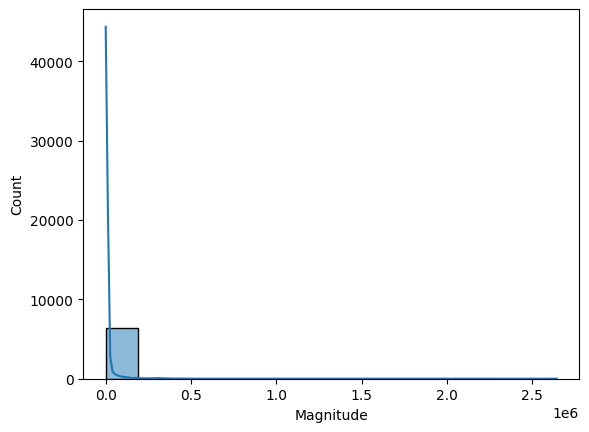

In [59]:
# Menampilkan statistik deskriptif untuk memeriksa nilai yang tidak konsisten atau outlier
print(data_cleaned.describe())

# Memeriksa distribusi data numerik
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data_cleaned["Magnitude"], kde=True)
plt.show()

In [60]:
print(sorted(data_cleaned["Magnitude"].unique())[-20:])  # 20 nilai tertinggi

[np.float64(431896.0), np.float64(436700.0), np.float64(441236.3), np.float64(449300.0), np.float64(462763.09), np.float64(471100.0), np.float64(483900.0), np.float64(500000.0), np.float64(542100.0), np.float64(560000.0), np.float64(619200.0), np.float64(629961.6), np.float64(632315.72), np.float64(720844.3), np.float64(776608.03), np.float64(812700.0), np.float64(1215862.0), np.float64(1287000.0), np.float64(1341347.0), np.float64(2643786.0)]


In [61]:
outlier_magnitude = data_cleaned[data_cleaned["Magnitude"] > 20]
print(outlier_magnitude[["DisNo.", "Country", "Disaster Type", "Magnitude"]])

             DisNo.                     Country           Disaster Type  \
1     2000-0005-CHN                       China                    road   
2     2000-0006-CHN                       China    fire (miscellaneous)   
3     2000-0009-IRN  Iran (Islamic Republic Of)                   storm   
4     2000-0010-IDN                   Indonesia                    road   
5     2000-0011-IDN                   Indonesia                    road   
...             ...                         ...                     ...   
6523  2025-0211-JPN                       Japan                wildfire   
6524  2025-0217-IND                       India                   storm   
6528  2025-0227-IRQ                        Iraq                   flood   
6529  2025-0235-MYS                    Malaysia       fire (industrial)   
6530  2025-0237-IND                       India  explosion (industrial)   

      Magnitude  
1         160.0  
2         160.0  
3         120.0  
4         160.0  
5        

In [62]:
print(data_cleaned["Magnitude"].value_counts().head(10))

Magnitude
160.0    4992
5.6        30
5.9        25
5.4        22
5.8        21
6.3        21
120.0      21
5.1        20
6.1        20
6.4        19
Name: count, dtype: int64


In [63]:
print(data_cleaned[data_cleaned["Magnitude"] > 20]["Disaster Type"].value_counts())

Disaster Type
flood                               1671
storm                               1079
road                                 704
water                                414
explosion (industrial)               344
mass movement (wet)                  293
fire (miscellaneous)                 216
epidemic                             159
air                                  154
rail                                 119
extreme temperature                  104
miscellaneous accident (general)      96
drought                               94
fire (industrial)                     92
collapse (miscellaneous)              88
explosion (miscellaneous)             84
industrial accident (general)         78
collapse (industrial)                 72
volcanic activity                     52
wildfire                              41
gas leak                              29
poisoning                             14
chemical spill                         8
mass movement (dry)                    7
gl

In [64]:
import numpy as np

data_cleaned.loc[data_cleaned["Magnitude"] > 20, "Magnitude"] = np.nan

count    485.000000
mean       6.043093
std        1.311889
min        0.000000
25%        5.400000
50%        6.000000
75%        6.700000
max       11.300000
Name: Magnitude, dtype: float64


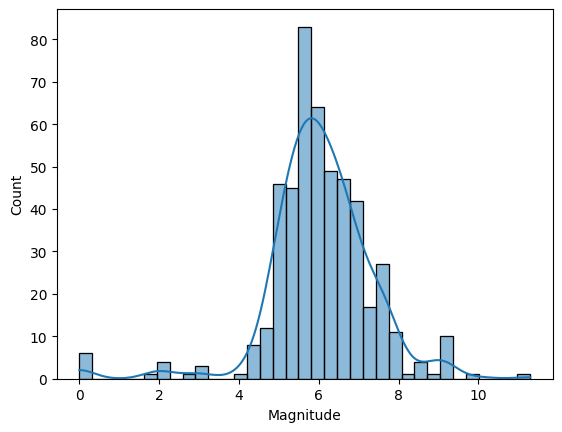

In [65]:
print(data_cleaned["Magnitude"].describe())
sns.histplot(data_cleaned["Magnitude"].dropna(), kde=True)
plt.show()

In [69]:
import pandas as pd
import numpy as np

# Cek missing values di seluruh kolom
print("=== Missing Values ===")
print(data_cleaned.isnull().sum().sort_values(ascending=False))

# Cek nilai unik di kolom kategorikal untuk mendeteksi inkonsistensi penulisan
print("\n=== Unique Values in Categorical Columns ===")
categorical_cols = data_cleaned.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"{col}: {data_cleaned[col].nunique()} unique values")
    print(data_cleaned[col].value_counts(dropna=False).head(10))
    print()

# Cek statistik deskriptif untuk outlier di kolom numerik
print("\n=== Descriptive Statistics (Numerical Columns) ===")
print(data_cleaned.describe())

# Cek outlier kasar (nilai jauh dari IQR) untuk kolom numerik
print("\n=== Outlier Check Based on IQR ===")
numerical_cols = data_cleaned.select_dtypes(include=np.number).columns
for col in numerical_cols:
    Q1 = data_cleaned[col].quantile(0.25)
    Q3 = data_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data_cleaned[(data_cleaned[col] < Q1 - 1.5 * IQR) | (data_cleaned[col] > Q3 + 1.5 * IQR)]
    print(f"{col}: {len(outliers)} potential outliers")

# Cek nilai-nilai negatif yang tidak masuk akal (misalnya jumlah korban, kerusakan)
print("\n=== Cek Nilai Negatif Tidak Masuk Akal ===")
columns_to_check = ["Total Affected", "No. Affected", "No. Homeless", "Total Damage ('000 US$)",
                    "AID Contribution ('000 US$)", "Magnitude"]
for col in columns_to_check:
    if col in data_cleaned.columns:
        neg_values = data_cleaned[data_cleaned[col] < 0]
        print(f"{col}: {len(neg_values)} negative values")

=== Missing Values ===
Magnitude                                    6023
DisNo.                                          0
Classification Key                              0
Historic                                        0
Disaster Subgroup                               0
Disaster Type                                   0
Disaster Subtype                                0
Disaster Group                                  0
ISO                                             0
Country                                         0
Region                                          0
Subregion                                       0
OFDA/BHA Response                               0
Appeal                                          0
Declaration                                     0
Location                                        0
AID Contribution ('000 US$)                     0
Magnitude Scale                                 0
Latitude                                        0
Longitude                  

In [70]:
# Salin data awal agar tidak merusak versi asli
data_cleaned = data.copy()

# 1. Hapus kolom yang tidak berguna atau tidak bervariasi
drop_cols = ["Region", "Admin Units"]
data_cleaned.drop(columns=drop_cols, inplace=True)

# 2. Set DisNo sebagai index (karena unik untuk tiap bencana)
data_cleaned.set_index("DisNo.", inplace=True)

# 3. Bersihkan kolom 'Magnitude' hanya untuk bencana gempa
# Biarkan nilai selain earthquake tetap NaN
data_cleaned.loc[data_cleaned["Disaster Type"] != "earthquake", "Magnitude"] = None

# 4. Tampilkan ringkasan data bersih
print("=== Data Bersih (Preview) ===")
display(data_cleaned.head())

# 5. Cek kembali missing values untuk konfirmasi
print("\n=== Cek Missing Values Setelah Pembersihan ===")
print(data_cleaned.isnull().sum()[data_cleaned.isnull().sum() > 0])

=== Data Bersih (Preview) ===


,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,Country,...,Total Affected,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Entry Date,Last Update
DisNo.,,,,,,,,,,,,,,,,,,,,,
2000-0003-BGD,No,nat-met-ext-col,Natural,Meteorological,Extreme temperature,Cold wave,NaN,NaN,BGD,Bangladesh,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,2003-07-01,2023-09-25
2000-0005-CHN,No,tec-tra-roa-roa,Technological,Transport,Road,Road,NaN,NaN,CHN,China,...,29.0,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,2005-02-09,2023-09-25
2000-0006-CHN,No,tec-mis-fir-fir,Technological,Miscellaneous accident,Fire (Miscellaneous),Fire (Miscellaneous),NaN,Hotel,CHN,China,...,18.0,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,2003-07-01,2023-09-25
2000-0009-IRN,No,nat-met-sto-sto,Natural,Meteorological,Storm,Storm (General),NaN,NaN,IRN,Iran (Islamic Republic of),...,5500.0,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,2003-07-01,2023-09-25
2000-0010-IDN,No,tec-tra-roa-roa,Technological,Transport,Road,Road,NaN,NaN,IDN,Indonesia,...,22.0,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,2003-07-01,2023-09-25



=== Cek Missing Values Setelah Pembersihan ===
External IDs                                 5460
Event Name                                   4299
Location                                      192
Origin                                       4878
Associated Types                             5128
AID Contribution ('000 US$)                  6306
Magnitude                                    6531
Magnitude Scale                              2274
Latitude                                     5597
Longitude                                    5597
River Basin                                  6129
Start Month                                     7
Start Day                                     364
End Month                                      37
End Day                                       360
Total Deaths                                  959
No. Injured                                  3677
No. Affected                                 3500
No. Homeless                                 5959
To

In [71]:
# Simpan ke file CSV (opsional)
data_cleaned.to_csv("data_cleaned.csv")

In [75]:
import pandas as pd

# Load file lama
df = pd.read_csv("data_cleaned.csv")

# Rename kolom ekonomi
df = df.rename(columns={
    "Total Damage ('000 US$)": "Total Damage",
    "AID Contribution ('000 US$)": "Aid Contribution",
    "Reconstruction Costs ('000 US$)": "Reconstruction Costs"
})

# Simpan ke file baru
df.to_csv("data_cleaned_renamed.csv", index=False)
print("File baru disimpan sebagai 'data_cleaned_renamed.csv'")

File baru disimpan sebagai 'data_cleaned_renamed.csv'


# Visualisation

In [1]:
!pip install streamlit==1.32.2 streamlit-folium pyngrok

In [15]:
import streamlit as st
import pandas as pd
import plotly.express as px
import folium
from streamlit_folium import st_folium

st.set_page_config(page_title="Disaster Dashboard Asia", layout="wide")

@st.cache_data
def load_data():
    data = pd.read_csv("data_cleaned_renamed.csv")
    return data

data = load_data()


with st.sidebar:
    st.header("Filter")
    country = st.multiselect("Select Country", options=data["Country"].unique(), default=data["Country"].unique())
    year = st.slider("Select Year Range", int(data["Start Year"].min()), int(data["Start Year"].max()), (2010, 2025))
    disaster_type = st.multiselect("Disaster Type", options=data["Disaster Type"].unique(), default=data["Disaster Type"].unique())

filtered = data[
    (data["Country"].isin(country)) &
    (data["Start Year"] >= year[0]) & (data["Start Year"] <= year[1]) &
    (data["Disaster Type"].isin(disaster_type))
]

st.subheader("General Statistics")
col1, col2, col3 = st.columns(3)
col1.metric("Total Disasters", len(filtered))
col2.metric("Total Deaths", int(filtered["Total Deaths"].sum()))
col3.metric("Total Damage (US$)", f"{int(filtered['Total Damage'].sum() * 1000):,}")

st.subheader("Disaster Count by Type")
disaster_count = filtered["Disaster Type"].value_counts().reset_index()
disaster_count.columns = ["Disaster Type", "Count"]
st.plotly_chart(px.bar(disaster_count, x="Disaster Type", y="Count", title="Disasters by Type"))

st.subheader("Social Impact")
social_cols = ["Total Deaths", "No. Injured", "No. Affected", "No. Homeless"]
social_data = filtered[social_cols].sum().reset_index()
social_data.columns = ["Impact", "Total"]
st.plotly_chart(px.bar(social_data, x="Impact", y="Total", title="Total Social Impact"))

st.subheader("Economic Impact")
econ_cols = ["Total Damage", "Aid Contribution", "Reconstruction Costs"]
econ_data = filtered[econ_cols].sum().reset_index()
econ_data.columns = ["Economic Metric", "Total"]
econ_data["Total"] = econ_data["Total"] * 1000
st.plotly_chart(px.bar(econ_data, x="Economic Metric", y="Total", title="Total Economic Impact (in US$)"))

st.subheader("Disaster Trend Over Time")
trend = filtered.groupby("Start Year").size().reset_index(name="Count")
st.plotly_chart(px.line(trend, x="Start Year", y="Count", title="Disasters Over Years"))

st.subheader("Disaster Locations Map")
filtered = filtered.dropna(subset=["Latitude", "Longitude"])
m = folium.Map(location=[25, 100], zoom_start=4)
for _, row in filtered.iterrows():
    folium.CircleMarker(
        location=[row["Latitude"], row["Longitude"]],
        radius=5,
        popup=f"{row['Disaster Type']} ({row['Start Year']})",
        color="crimson",
        fill=True,
        fill_color="crimson"
    ).add_to(m)
st_data = st_folium(m, width=1200, height=500)

st.markdown("---")
st.caption("Data source: Cleaned EM-DAT-like Dataset")

2025-04-08 21:58:40.726 No runtime found, using MemoryCacheStorageManager


DeltaGenerator()

In [16]:
code = '''
import streamlit as st
import pandas as pd
import plotly.express as px
import folium
from streamlit_folium import st_folium

st.set_page_config(page_title="Disaster Dashboard Asia", layout="wide")

@st.cache_data
def load_data():
    data = pd.read_csv("data_cleaned_renamed.csv")
    return data

data = load_data()


with st.sidebar:
    st.header("Filter")
    country = st.multiselect("Select Country", options=data["Country"].unique(), default=data["Country"].unique())
    year = st.slider("Select Year Range", int(data["Start Year"].min()), int(data["Start Year"].max()), (2010, 2025))
    disaster_type = st.multiselect("Disaster Type", options=data["Disaster Type"].unique(), default=data["Disaster Type"].unique())

filtered = data[
    (data["Country"].isin(country)) &
    (data["Start Year"] >= year[0]) & (data["Start Year"] <= year[1]) &
    (data["Disaster Type"].isin(disaster_type))
]

st.subheader("General Statistics")
col1, col2, col3 = st.columns(3)
col1.metric("Total Disasters", len(filtered))
col2.metric("Total Deaths", int(filtered["Total Deaths"].sum()))
col3.metric("Total Damage (US$)", f"{int(filtered['Total Damage'].sum() * 1000):,}")

st.subheader("Disaster Count by Type")
disaster_count = filtered["Disaster Type"].value_counts().reset_index()
disaster_count.columns = ["Disaster Type", "Count"]
st.plotly_chart(px.bar(disaster_count, x="Disaster Type", y="Count", title="Disasters by Type"))

st.subheader("Social Impact")
social_cols = ["Total Deaths", "No. Injured", "No. Affected", "No. Homeless"]
social_data = filtered[social_cols].sum().reset_index()
social_data.columns = ["Impact", "Total"]
st.plotly_chart(px.bar(social_data, x="Impact", y="Total", title="Total Social Impact"))

st.subheader("Economic Impact")
econ_cols = ["Total Damage", "Aid Contribution", "Reconstruction Costs"]
econ_data = filtered[econ_cols].sum().reset_index()
econ_data.columns = ["Economic Metric", "Total"]
econ_data["Total"] = econ_data["Total"] * 1000
st.plotly_chart(px.bar(econ_data, x="Economic Metric", y="Total", title="Total Economic Impact (in US$)"))

st.subheader("Disaster Trend Over Time")
trend = filtered.groupby("Start Year").size().reset_index(name="Count")
st.plotly_chart(px.line(trend, x="Start Year", y="Count", title="Disasters Over Years"))

st.subheader("Disaster Locations Map")
filtered = filtered.dropna(subset=["Latitude", "Longitude"])
m = folium.Map(location=[25, 100], zoom_start=4)
for _, row in filtered.iterrows():
    folium.CircleMarker(
        location=[row["Latitude"], row["Longitude"]],
        radius=5,
        popup=f"{row['Disaster Type']} ({row['Start Year']})",
        color="crimson",
        fill=True,
        fill_color="crimson"
    ).add_to(m)
st_data = st_folium(m, width=1200, height=500)

st.markdown("---")
st.caption("Data source: Cleaned EM-DAT-like Dataset")
'''

with open("app.py", "w") as f:
    f.write(code)

print("File app.py berhasil dibuat.")
files.download("app.py")

File app.py berhasil dibuat.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
reqs = """
streamlit>=1.31.1
pandas>=1.5.3
plotly>=5.19.0
folium>=0.15.1
streamlit-folium>=0.15.0
"""

with open("requirements.txt", "w") as f:
    f.write(reqs.strip())

from google.colab import files
files.download("requirements.txt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>